<a href="https://colab.research.google.com/github/Doradux/Metricas-de-clasificacion-2-valores/blob/main/metricas_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [231]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import random
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import joblib

## Ejercicio 1



Si una red neuronal para detectar si una radiografía es de un tórax ha predicho lo siguiente:

- Para 13 radiografías que eran de tórax , en 8 ha dicho que era un tórax y en 5 ha dicho que no lo era.
- Para 7 radiografías que no eran un tórax , en 4 ha dicho que no era un tórax y en 3 ha dicho que lo era.

Indica el nº de:

- Verdaderos Positivos (TP) -> 8TP
- Verdaderos Negativos (TN) -> 4TN
- Falsos Positivos (FP) -> 5FP
- Falsos Negativos (FN) -> 3FN

Dibuja la matriz de confusión


In [232]:
def plot_matriz_confusion(axes,TP=0,TN=0,FP=0,FN=0,fontsize=15,vpp=None,vpn=None,sensibilidad=None,especificidad=None,f1_score=None,mcc=None,auc=None,prevalencia=None):
    success_color=matplotlib.colors.to_rgb('#9EE548')
    failure_color=matplotlib.colors.to_rgb("#C32240")
    blanco_color=matplotlib.colors.to_rgb("#FFFFFF")


    if ((vpp is not None) |
        (vpn is not None) |
        (sensibilidad is not None) |
        (especificidad is not None) |
        (prevalencia is not None) |
        (f1_score is not None) |
        (mcc is not None) |
        (auc is not None) ):
        show_metrics=True
    else:
        show_metrics=False


    if show_metrics==False:
        axes.imshow([[success_color,failure_color],[failure_color,success_color]])
    else:
        axes.imshow([[success_color,failure_color,blanco_color],[failure_color,success_color,blanco_color],[blanco_color,blanco_color,blanco_color]])



    labels = ['Positivo','Negativo']
    xaxis = np.arange(len(labels))
    axes.set_xticks(xaxis)
    axes.set_yticks(xaxis)
    axes.set_xticklabels(labels, fontsize=13, color="#003B80")
    axes.set_yticklabels(labels, fontsize=13, color="#003B80")
    axes.text(0, 0, str(TP)+" TP",ha="center", va="center", color="#0A2102",fontsize=fontsize)
    axes.text(0, 1, str(FP)+" FP",ha="center", va="center", color="#FAEAEA",fontsize=fontsize)
    axes.text(1, 0, str(FN)+" FN",ha="center", va="center", color="#FAEAEA",fontsize=fontsize)
    axes.text(1, 1, str(TN)+" TN",ha="center", va="center", color="#0A2102",fontsize=fontsize)
    axes.xaxis.tick_top()
    axes.set_xlabel('Predicción', fontsize=fontsize, color="#003B80")
    axes.xaxis.set_label_position('top')
    axes.set_ylabel('Realidad', fontsize=fontsize, color="#003B80")


    if show_metrics==True:


        if (vpp is not None):
            axes.text(0, 2, f"Precision\n{vpp:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4)
        if (vpn is not None):
            axes.text(1, 2, f"VPN\n{vpn:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4)
        if (sensibilidad is not None):
            axes.text(2, 0, f"Sensibilidad\n{sensibilidad:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4)
        if (especificidad is not None):
            axes.text(2, 1, f"Especificidad\n{especificidad:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4)

        metricas_generales=""
        if (prevalencia is not None):
            metricas_generales=metricas_generales+f"Prevalencia\n{prevalencia:.2f}\n"
        if (f1_score is not None):
            metricas_generales=metricas_generales+f"F1-score\n{f1_score:.2f}\n"
        if (mcc is not None):
            metricas_generales=metricas_generales+f"MCC\n{mcc:.2f}\n"
        if (auc is not None):
            metricas_generales=metricas_generales+f"AUC\n{auc:.2f}"

        axes.text(2, 2, metricas_generales,ha="center", va="center", color="#0A2102",fontsize=fontsize-4)


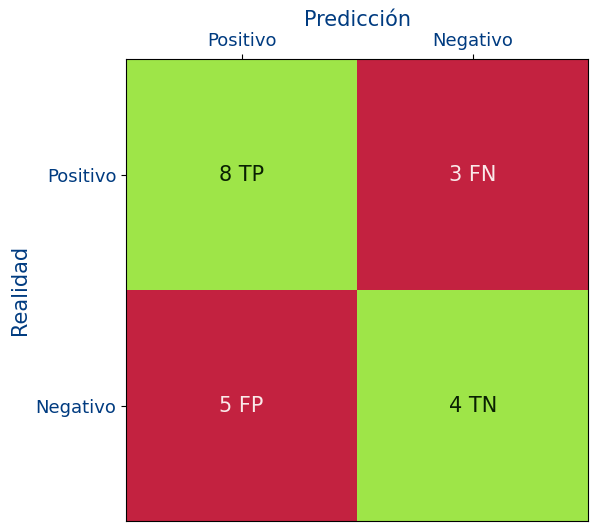

In [233]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_matriz_confusion(ax, TP=8,TN=4,FP=5,FN=3)

### Ejercicio 2a

Seguimos con la red neuronal que predice si una radiografía es de tórax.  

Si para 10 imágenes ha sacado los siguientes resultados:  

    y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])  

Indica para cada valor predicho , si ha predicho que era una imagen de tórax o no.

In [234]:
y_score=np.array([0.27, 0.45, 0.76, 0.55, 0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])
umbral = 0.5
y_pred = (y_score >= umbral).astype(int)
for i in y_pred:
    if i==1:
        print("Imagen de torax")
    else:
        print("No es torax")

No es torax
No es torax
Imagen de torax
Imagen de torax
No es torax
No es torax
No es torax
No es torax
Imagen de torax
Imagen de torax
Imagen de torax
No es torax
No es torax


## Ejercicio 2b

Seguimos con la red neuronal que predice si una radiografía es de tórax.

Si para 10 imágenes ha sacado los siguientes resultados:

    y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])
Pero los valores verdaderos son los siguientes:

    y_true=np.array([1,0,1,0,0,0,1,0,1,1,1,1,0])

Indica el nº de:

 - Verdaderos Positivos (TP)
 - Verdaderos Negativos (TN)
 - Falsos Positivos (FP)
 - Falsos Negativos (FN)

Dibuja la matriz de confusión


In [235]:
y_score=np.array([0.27, 0.45, 0.76, 0.55, 0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])
umbral = 0.5
y_pred = (y_score >= umbral).astype(int)
y_true=np.array([1,0,1,0,0,0,1,0,1,1,1,1,0])

TP = np.sum((y_pred == 1) & (y_true == 1))
FP = np.sum((y_pred == 1) & (y_true == 0))
TN = np.sum((y_pred == 0) & (y_true == 0))
FN = np.sum((y_pred == 0) & (y_true == 1))

print(
    f"TP => {TP}\nFP => {FP}\nTN => {TN}\nFN => {FN}\n"
)

TP => 4
FP => 1
TN => 5
FN => 3



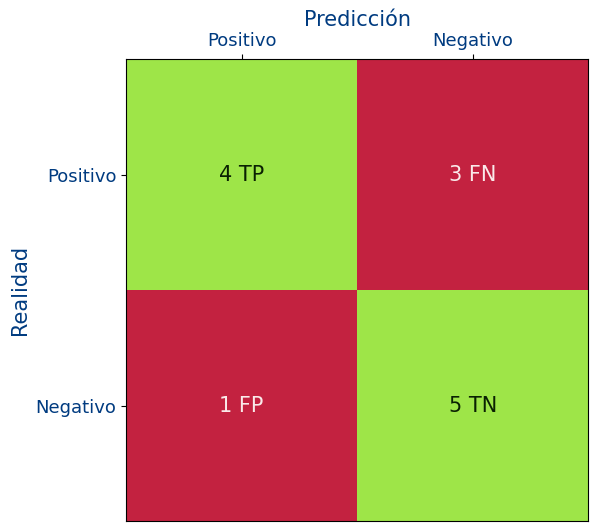

In [236]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_matriz_confusion(ax, TP, TN, FP, FN)

## Ejercicio 2c

Siguiendo con los datos anteriores y suponiendo que el umbral es 0.5:
    
    y_true=np.array([1,0,1,0,0,0,1,0,1,1,1,1,0])
    y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])

Calcula directamente las siguientes métricas:
- Prevalencia
- Sensibilidad
- Especificidad
- VPP
- VPN



In [237]:
#prevalencia = (TP+FN)/total de muestras
prevalencia = (TP+FN)/(len(y_score))
print(f"Prevalencia => {prevalencia}")

#sensibilidad = TP/(TP+FN)
sensibilidad = TP/(TP+FN)
print(f"sensibilidad => {sensibilidad}")

#especifidad = TN/(TN+FP)
especifidad = TN/(TN+FP)
print(f"Especifidad => {especifidad}")

#VPP = TP/(TP+FP)
VPP = TP/(TP+FP)
print(f"VPP => {VPP}")

#VPN = TN/(TN+FN)
VPN = TN/(TN+FN)
print(f"VPN => {VPN}")

Prevalencia => 0.5384615384615384
sensibilidad => 0.5714285714285714
Especifidad => 0.8333333333333334
VPP => 0.8
VPN => 0.625


## Ejercicio 3a

Crea una red neuronal con los datos de bread cancer con las siguientes características:
 - neuronas por capa:[30,64,32,16,8,1]
 - Función de activation: ELU
 - Nº de epocas: 20
 - Optimizador: Adam con tasa de aprendizaje de 0,0001

Muestra las siguientes métricas durante el entrenamiento (para cada una de las épocas):
 - Loss
 - Sensibilidad
 - Especificidad


In [238]:
from sklearn.datasets import load_breast_cancer
from tensorflow.keras.optimizers import Adam

breast_cancer = load_breast_cancer()
x = breast_cancer.data
y = breast_cancer.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Especifidad

In [239]:
class Especificidad(tf.keras.metrics.Metric):
    def __init__(self, name="especificidad", **kwargs):
        super(Especificidad, self).__init__(name=name, **kwargs)
        self.true_negatives = self.add_weight(name="tn", initializer="zeros")
        self.false_positives = self.add_weight(name="fp", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Convertir a float32 para evitar conflictos de tipo
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.round(y_pred)
        tn = tf.reduce_sum((1 - y_true) * (1 - y_pred))
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        self.true_negatives.assign_add(tn)
        self.false_positives.assign_add(fp)

    def result(self):
        return self.true_negatives / (self.true_negatives + self.false_positives + tf.keras.backend.epsilon())

    def reset_states(self):
        self.true_negatives.assign(0.0)
        self.false_positives.assign(0.0)


Sensibilidad

In [240]:
class Sensibilidad(tf.keras.metrics.Metric):
    def __init__(self, name="sensibilidad", **kwargs):
        super(Sensibilidad, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name="tp", initializer="zeros")
        self.false_negatives = self.add_weight(name="fn", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Convertir a float32 para evitar conflictos de tipo
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.round(y_pred)  # Redondeamos para obtener las predicciones binarias
        tp = tf.reduce_sum(y_true * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))
        self.true_positives.assign_add(tp)
        self.false_negatives.assign_add(fn)

    def result(self):
        return self.true_positives / (self.true_positives + self.false_negatives + tf.keras.backend.epsilon())

    def reset_states(self):
        self.true_positives.assign(0.0)
        self.false_negatives.assign(0.0)

In [241]:
np.random.seed(5)
tf.random.set_seed(5)
random.seed(5)

model = Sequential()
model.add(Dense(30, activation='elu', input_dim=30))
model.add(Dense(64, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(16, activation='elu'))
model.add(Dense(8, activation='elu'))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', Sensibilidad(), Especificidad()])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [242]:
model.fit(x, y, epochs=20)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6257 - especificidad: 0.0000e+00 - loss: 5.3901 - sensibilidad: 1.0000
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6257 - especificidad: 0.0000e+00 - loss: 2.5114 - sensibilidad: 1.0000
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6257 - especificidad: 0.0000e+00 - loss: 1.4097 - sensibilidad: 1.0000
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6335 - especificidad: 0.0082 - loss: 0.8120 - sensibilidad: 0.9925
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7917 - especificidad: 0.1769 - loss: 0.5189 - sensibilidad: 0.8319
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8523 - especificidad: 0.2948 - loss: 0.3962 - sensibilidad: 0.7180
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8652 - especificidad: 0.3231 - loss: 0.3584 - sensibilidad: 0.6905
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.87

## Ejercicio 3b

En este ejercicio vamos a mostrar la matriz de confusión de la red que acabamos de crear.

Para ello vamos a usar los valores de test que los tenemos en las siguientes variables del ejercicio anterior:
- x_test
- y_test

La variable y_test es lo que llamamos y_true mientras que con x_test obtendremos y_score.

Para ello sigue los siguientes pasos:

- Crea una función llamada get_matriz_confusion(y_true,y_score,threshold) que retorne TP ,TN, FP y FN
- Calcula y_score usando el método predict del modelo y usando la variable x_test
- Haz que y_true sea igual a y_test
- Llama a la función get_matriz_confusion
- Muestra la matriz de confusión



In [243]:
import numpy as np

#x_test = x
#y_test = y # y_true

def get_matriz_confusion(y_true, y_score, threshold=0.5):
    y_pred = (y_score >= threshold).astype(int)
    TP = np.sum((y_pred == 1) & (y_true == 1))
    FP = np.sum((y_pred == 1) & (y_true == 0))
    TN = np.sum((y_pred == 0) & (y_true == 0))
    FN = np.sum((y_pred == 0) & (y_true == 1))
    return {"TP": TP, "FP": FP, "TN": TN, "FN": FN}

y_score = model.predict(x_test).ravel()  # Convierte un array multidimensional en un vector unidimensional
matriz_conf = get_matriz_confusion(y_test, y_score)
print(matriz_conf)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
{'TP': 71, 'FP': 4, 'TN': 39, 'FN': 0}


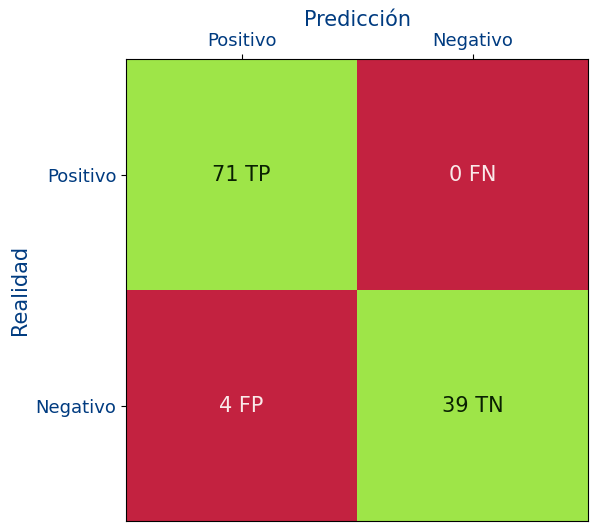

In [244]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_matriz_confusion(ax, matriz_conf['TP'], matriz_conf['TN'], matriz_conf['FP'], matriz_conf['FN'])

## Ejercicio 3c

Crea una función llamada get_metrics(TP,TN,FP,FN,Prevalencia=None) que retorne las siguientes métricas:

- Sensibilidad
- Especificidad
- VPP
- VPN
- Prevalencia

Para calcular VPP y VPN se debe usar la prevalencia. Si no se pasa el valor de prevalencia ( Es decir 'prevalencia==None', se usará el de los datos y sino se usará la prevalencia que se pase como argumento.

Usando los valores de TP ,TN, FP y FN del ejercicio anterior, muestra las métricas que retorna get_metrics

Muestra todo en la matriz de confusión.

In [245]:
def get_metrics(TP, TN, FP, FN, Prevalencia=None):
    total_muestras = TP + TN + FP + FN
    if Prevalencia is None:
        #prevalencia = (TP+FN)/total de muestras
        Prevalencia = (TP+FN)/total_muestras
    #sensibilidad = TP/(TP+FN)
    sensibilidad = TP/(TP+FN)

    #especifidad = TN/(TN+FP)
    especifidad = TN/(TN+FP)

    #VPP = TP/(TP+FP)
    VPP = (Prevalencia * sensibilidad) / ((Prevalencia * sensibilidad) + ((1 - Prevalencia) * (1 - especifidad)))

    #VPN = TN/(TN+FN)
    VPN = ((1 - Prevalencia) * especifidad) / (((1 - Prevalencia) * especifidad) + (Prevalencia * (1 - sensibilidad)))

    return {"Sensibilidad": sensibilidad, "Especificidad": especifidad, "VPP": VPP, "VPN": VPN, "Prevalencia": Prevalencia}

In [246]:
metrics = get_metrics(matriz_conf['TP'], matriz_conf['TN'], matriz_conf['FP'], matriz_conf['FN'])
metrics

{'Sensibilidad': 1.0,
 'Especificidad': 0.9069767441860465,
 'VPP': 0.9466666666666667,
 'VPN': 1.0,
 'Prevalencia': 0.6228070175438597}

## Ejercicio 3d

Guarda el modelo a disco

In [247]:
joblib.dump(model, "modelo_disco.pkl")

['modelo_disco.pkl']

## Ejercicio 3e

## Ejercicio 3f

Muestra ahora 1 gráfica, en la que se mostrará:
- El valor de la sensibilidad y la especificidad según el valor del umbral

¿Que valor de umbral dejarías?

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


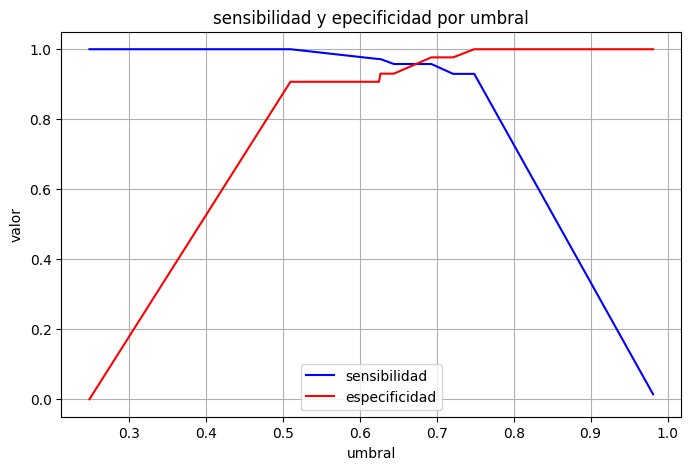

In [248]:
from sklearn.metrics import roc_curve

# Obtener las probabilidades de clase positiva (1) de la red neuronal
y_score = model.predict(x_test).ravel()  # Esto devuelve un array de probabilidades

# Ahora puedes usar este y_score con la matriz de confusión o la curva ROC
y_true = y_test  # Etiquetas reales

# Calculamos sensibilidad (tpr), especificidad (1-fpr) y los umbrales
fpr, tpr, thresholds = roc_curve(y_true, y_score)

plt.figure(figsize=(8, 5))
plt.plot(thresholds, tpr, label="sensibilidad", color="blue")
plt.plot(thresholds, 1 - fpr, label="especificidad", color="red")
plt.xlabel("umbral")
plt.ylabel("valor")
plt.title("sensibilidad y epecificidad por umbral")
plt.legend()
plt.grid()
plt.show()


Dejaria un umbral entre 4 y 7.5 dependiendo de si compensa ganar especificidad o perderla

### Ejercicio 3g

Muestra una gráfica similar a las anteriores pero ahora sea la suma los valores de sensibilidad y la especificidad menos 1.

A la suma de los 2 valores para obtener el máximo pero restando 1 se le llama

informedness = sensibilidad  + especifidad -1

Muestra un punto con el máximo de la gráfica y el threshold correspondiente al máximo.Además para ese nivel de threshold, imprime la sensibilidad y la especificidad

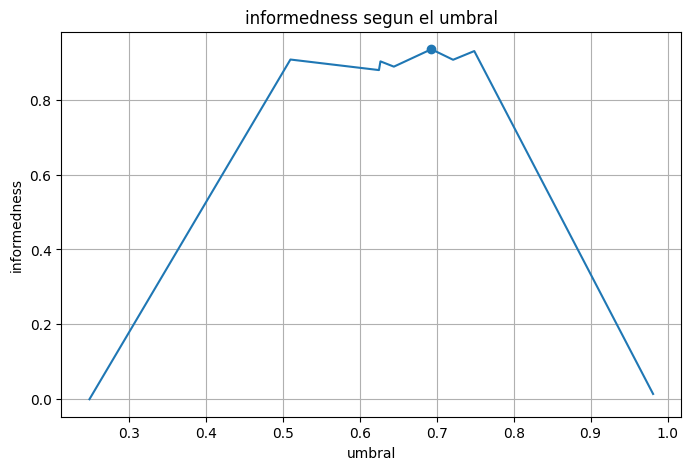

umbral optimo: 0.6930217742919922
sensibilidad optima: 0.9577464788732394
especificidad optima: 0.9767441860465116


In [249]:
specificity = 1 - fpr
informedness = tpr + specificity - 1

# Encontramos el índice del umbral que da el valor máximo de informedness
max_idx = np.argmax(informedness) #np.argmax() encuentra el índice donde el informedness es máximo, y se obtiene el umbral correspondiente a ese índice.
max_informedness = informedness[max_idx]
optimal_threshold = thresholds[max_idx]
optimal_sensitivity = tpr[max_idx]
optimal_specificity = specificity[max_idx]

plt.figure(figsize=(8, 5))
plt.plot(thresholds, informedness)
plt.scatter(optimal_threshold, max_informedness) #informedness optimo
plt.xlabel("umbral")
plt.ylabel("informedness")
plt.title("informedness segun el umbral")
plt.grid()

plt.show()

print(f"umbral optimo: {optimal_threshold}")
print(f"sensibilidad optima: {optimal_sensitivity}")
print(f"especificidad optima: {optimal_specificity}")

## Ejercicio 4

Indica en los siguientes problemas si subirías o bajarías el umbral

- Una IA que detecta si hay petroleo en el subsuelo  
        Bajar el umbral (menos falsos positivos)
- Una IA que predice si un usuario en Amazon está cometiendo fraude
        Subir el umbral (menos falsas acusaciones)
- Una IA que decide si te concede un préstamo
        Subir el umbral (evitar dar dinero a quien lo no podra devolver)
- Una IA que decide una persona en un juicio es inocente
        Subir el umbral (no declarar culpable a inocentes)
- Una IA que corrige automáticamente un examen y te dice si has aprobado
        Bajar el umbral (un falso negativo tiene menos peso que un falso positivo)

## Ejercicio 5a

Ejercicio 5.A
Crea una nueva red neuronal para el problema del bread cancer

Ahora razona con cual de las 2 redes te quedarías y que threshold elegirías para cada uno de ellos.

Para elegir debes mostrar gráficas , una al lado de la otra para comparar lo siguiente:

- Gráficos de perdida, sensibilida y especificidad durante el entrenamiento
- Matriz de confusión con las métricas: Sensibilidad, Especificidad, VPP, VPN, Prevalencia
- Threshold vs (Sensibilidad y Especificidad)
- Threshold vs Informedness (Muestra en el label el máximo)
¿Con que red te quedarías?

In [250]:
data = load_breast_cancer()
x = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

np.random.seed(5)
tf.random.set_seed(5)
random.seed(5)

model_1 = Sequential()
model_1.add(Dense(64, activation='elu', input_dim=30))
model_1.add(Dense(32, activation='elu'))
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test), verbose=1)

np.random.seed(5)
tf.random.set_seed(5)
random.seed(5)

model_2 = Sequential()
model_2.add(Dense(128, activation='elu', input_dim=30))
model_2.add(Dense(64, activation='elu'))
model_2.add(Dense(32, activation='elu'))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_2 = model_2.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test), verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.3649 - loss: 6.3991 - val_accuracy: 0.7193 - val_loss: 0.7651
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8339 - loss: 0.4782 - val_accuracy: 0.9474 - val_loss: 0.1219
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8808 - loss: 0.2633 - val_accuracy: 0.9386 - val_loss: 0.1770
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8918 - loss: 0.2445 - val_accuracy: 0.9386 - val_loss: 0.1613
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8960 - loss: 0.2880 - val_accuracy: 0.9386 - val_loss: 0.1578
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9106 - loss: 0.2513 - val_accuracy: 0.9386 - val_loss: 0.1356
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8896 - loss: 0.2640 - val_accuracy: 0.9386 - val_loss: 0.1673
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8967 - loss: 0.2774 - val_accuracy: 0.9386 - val_los

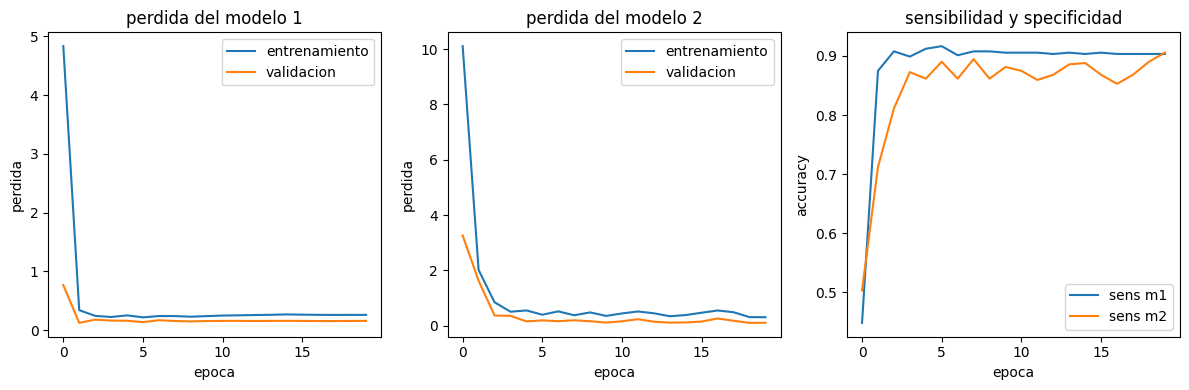

In [251]:
#Obtener las métricas de validación
history_1_dict = history_1.history
history_2_dict = history_2.history

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.plot(history_1_dict['loss'], label='entrenamiento')
plt.plot(history_1_dict['val_loss'], label='validacion')
plt.title('perdida del modelo 1')
plt.xlabel('epoca')
plt.ylabel('perdida')
plt.legend()

plt.subplot(132)
plt.plot(history_2_dict['loss'], label='entrenamiento')
plt.plot(history_2_dict['val_loss'], label='validacion')
plt.title('perdida del modelo 2')
plt.xlabel('epoca')
plt.ylabel('perdida')
plt.legend()

plt.subplot(133)
plt.plot(history_1_dict['accuracy'], label='sens m1')
plt.plot(history_2_dict['accuracy'], label='sens m2')
plt.title('sensibilidad y specificidad')
plt.xlabel('epoca')
plt.ylabel('accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [252]:
# Obtener las predicciones
y_pred_1 = (model_1.predict(x_test) > 0.5).astype(int).ravel()
y_pred_2 = (model_2.predict(x_test) > 0.5).astype(int).ravel()

mc_1 = get_matriz_confusion(y_test, y_pred_1)
mc_2 = get_matriz_confusion(y_test, y_pred_2)

metrics_1 = get_metrics(mc_1['TP'], mc_1['TN'], mc_1['FP'], mc_1['FN'])
metrics_2 = get_metrics(mc_2['TP'], mc_2['TN'], mc_2['FP'], mc_2['FN'])

print(f"metricas mc_1: {metrics_1}")
print(f"metricas mc_2: {metrics_2}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
metricas mc_1: {'Sensibilidad': 1.0, 'Especificidad': 0.8372093023255814, 'VPP': 0.9102564102564104, 'VPN': 1.0, 'Prevalencia': 0.6228070175438597}
metricas mc_2: {'Sensibilidad': 0.971830985915493, 'Especificidad': 0.9302325581395349, 'VPP': 0.9583333333333334, 'VPN': 0.9523809523809523, 'Prevalencia': 0.6228070175438597}


In [253]:
# Obtener las probabilidades de clase positiva para ambos modelos
y_score_1 = model_1.predict(x_test).ravel()
y_score_2 = model_2.predict(x_test).ravel()

# Calcular las curvas ROC para ambos modelos
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_score_1)
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_score_2)

specificity_1 = 1 - fpr_1
specificity_2 = 1 - fpr_2

informedness_1 = tpr_1 + specificity_1 - 1
informedness_2 = tpr_2 + specificity_2 - 1

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


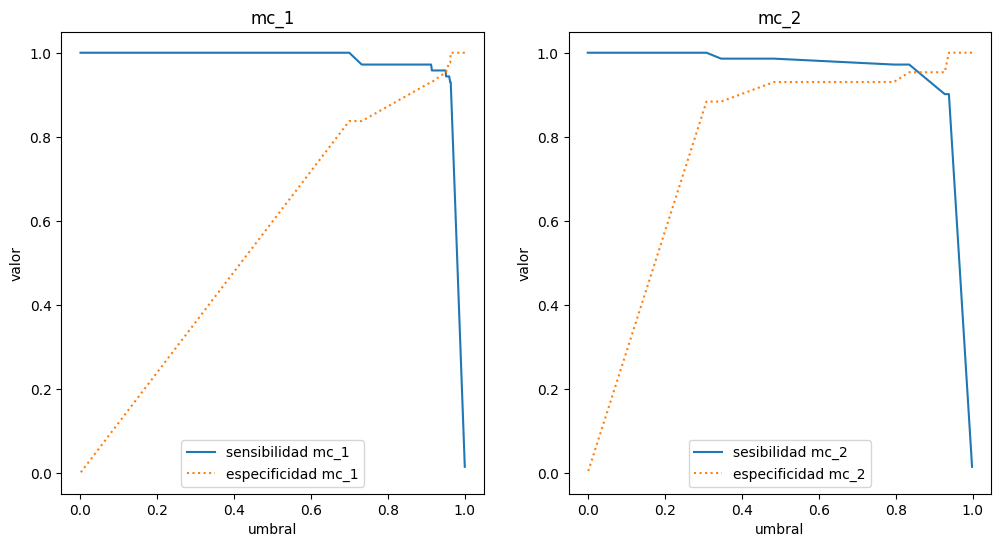

In [254]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(thresholds_1, tpr_1, label='sensibilidad mc_1')
plt.plot(thresholds_1, specificity_1, label='especificidad mc_1', linestyle='dotted')
plt.title('mc_1')
plt.xlabel('umbral')
plt.ylabel('valor')
plt.legend()

plt.subplot(122)
plt.plot(thresholds_2, tpr_2, label='sesibilidad mc_2')
plt.plot(thresholds_2, specificity_2, label='especificidad mc_2', linestyle='dotted')
plt.title('mc_2')
plt.xlabel('umbral')
plt.ylabel('valor')
plt.legend()

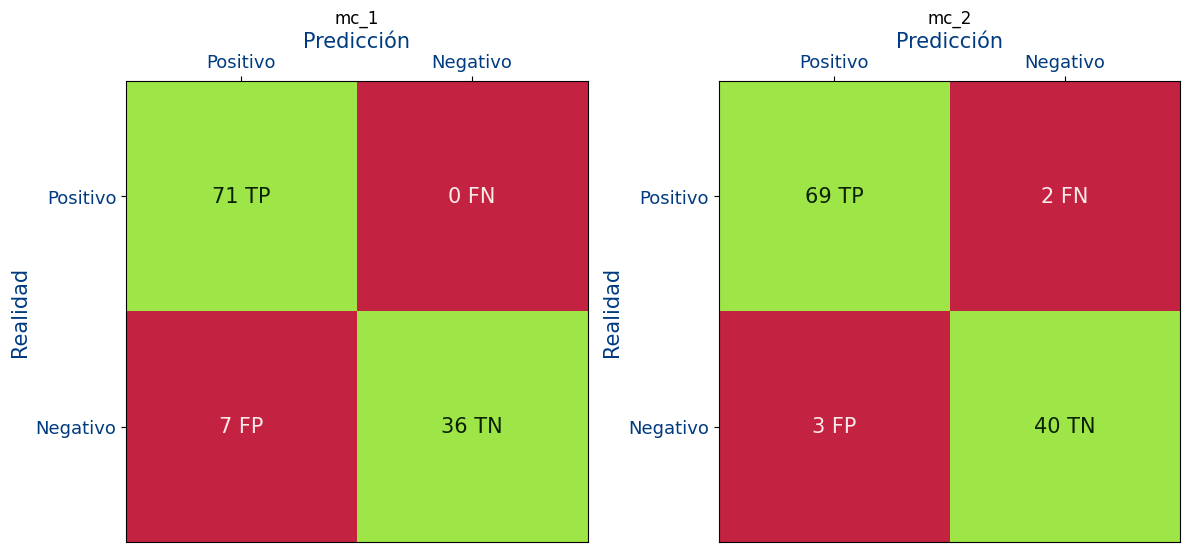

In [255]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

plot_matriz_confusion(ax1, mc_1['TP'], mc_1['TN'], mc_1['FP'], mc_1['FN'])
ax1.set_title('mc_1')

plot_matriz_confusion(ax2, mc_2['TP'], mc_2['TN'], mc_2['FP'], mc_2['FN'])
ax2.set_title('mc_2')

plt.tight_layout()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


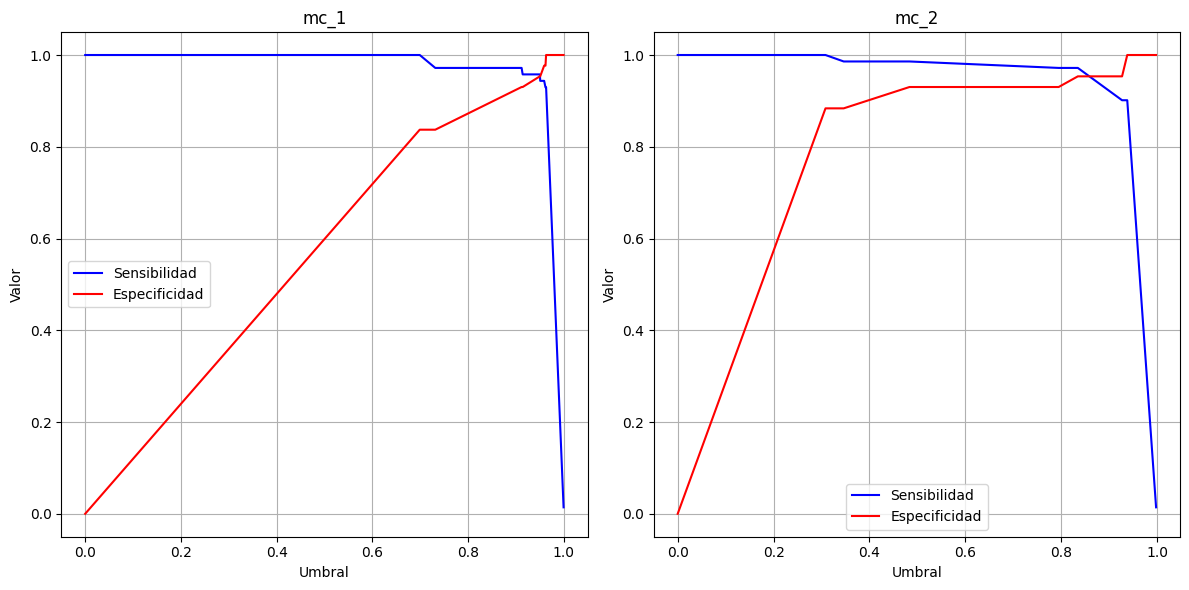

In [256]:
# Obtener las probabilidades de clase positiva (1) de la red neuronal
y_score = model.predict(x_test).ravel()  # Esto devuelve un array de probabilidades

# Ahora puedes usar este y_score con la matriz de confusión o la curva ROC
y_true = y_test  # Etiquetas reales

# Calculamos sensibilidad (tpr), especificidad (1-fpr) y los umbrales
fpr, tpr, thresholds = roc_curve(y_true, y_score_1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(thresholds, tpr, label="Sensibilidad", color="blue")
ax1.plot(thresholds, 1 - fpr, label="Especificidad", color="red")
ax1.set_xlabel("Umbral")
ax1.set_ylabel("Valor")
ax1.set_title("mc_1")
ax1.legend()
ax1.grid()

fpr, tpr, thresholds = roc_curve(y_true, y_score_2)
ax2.plot(thresholds, tpr, label="Sensibilidad", color="blue")
ax2.plot(thresholds, 1 - fpr, label="Especificidad", color="red")
ax2.set_xlabel("Umbral")
ax2.set_ylabel("Valor")
ax2.set_title("mc_2")
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()

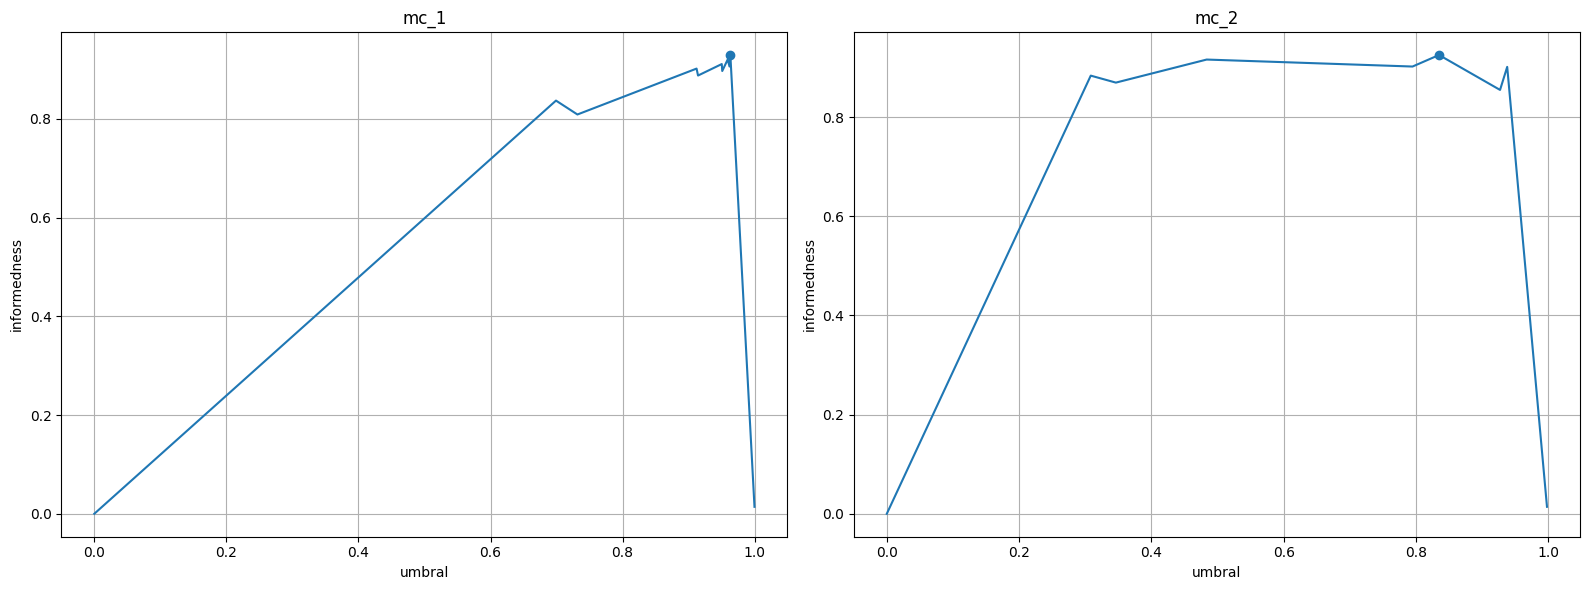

umbral optimo: 0.9631879329681396
sensibilidad optima: 0.9295774647887324
especificidad optima: 1.0
umbral optimo: 0.8346372842788696
sensibilidad optima: 0.971830985915493
especificidad optima: 0.9534883720930233


In [257]:

# Encontramos el índice del umbral que da el valor máximo de informedness
max_idx_1 = np.argmax(informedness_1) #np.argmax() encuentra el índice donde el informedness es máximo, y se obtiene el umbral correspondiente a ese índice.
max_informedness_1 = informedness_1[max_idx_1]
optimal_threshold_1 = thresholds_1[max_idx_1]
optimal_sensitivity_1 = tpr_1[max_idx_1]
optimal_specificity_1 = specificity_1[max_idx_1]

max_idx_2 = np.argmax(informedness_2) #np.argmax() encuentra el índice donde el informedness es máximo, y se obtiene el umbral correspondiente a ese índice.
max_informedness_2 = informedness_2[max_idx_2]
optimal_threshold_2 = thresholds_2[max_idx_2]
optimal_sensitivity_2 = tpr_2[max_idx_2]
optimal_specificity_2 = specificity_2[max_idx_2]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(thresholds_1, informedness_1)
ax1.scatter(optimal_threshold_1, max_informedness_1)
ax1.set_xlabel("umbral")
ax1.set_ylabel("informedness")
ax1.set_title("mc_1")
ax1.grid()

ax2.plot(thresholds_2, informedness_2)
ax2.scatter(optimal_threshold_2, max_informedness_2)
ax2.set_xlabel("umbral")
ax2.set_ylabel("informedness")
ax2.set_title("mc_2")
ax2.grid()

plt.tight_layout()
plt.show()


print(f"umbral optimo: {optimal_threshold_1}")
print(f"sensibilidad optima: {optimal_sensitivity_1}")
print(f"especificidad optima: {optimal_specificity_1}")
print("===============================================")
print(f"umbral optimo: {optimal_threshold_2}")
print(f"sensibilidad optima: {optimal_sensitivity_2}")
print(f"especificidad optima: {optimal_specificity_2}")

Eligira el modelo dos pues tiene una sensibilidad optima mayor, reduciendo asi los falsos negativos